## The Project
Our motivation of this project is to uncover common physical characteristics based on the duration of one's workout, and be able to give workout recommendations given physical traits using an ML model trained on our data. Two main questions we want to explore are:
1. How do workout and internal characteristics vary for individuals of a certain height and weight?
2. What is the average amount of calories burnt for and the workout duration of those individuals with a healthy physique?

## The Pipeline
Here is an overview of our data processing pipeline that we demonstrate below:
* We start off by scraping Kaggle's site of our dataset using <u>def scrape</u>, which generates a zip file in the user's Files system containing the calories dataset
* In <u>def get_data</u>, we read in the calories.csv from the zipped folder produced in def scrape
*  Finally <u>def add_bmi</u> uses the dataframe from get_data and creates a new column of the BMI for each record. This will be helpful when creating the predictive ML model

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
username = 'rohanbatra8'
key = 'db9b00f3a8c45858cf4e75c395cdba2c'

In [6]:
def scrape(username, key):
    ''' scrapes Kaggle for our calories dataset
    
    Args: username (string) - the username of the Kaggle user we can access the dataset through
          key (string) - the Kaggle string to reach the environment
    Returns: none - nothing is returned to the user, but a folder containing calories.csv is created in the user's Files system
        
    '''
    
    # Cell 1: Install Kaggle API 
    !pip install kaggle
    
    # Cell 2: Set Kaggle API credentials
    import os
    os.environ['KAGGLE_USERNAME'] = username  
    os.environ['KAGGLE_KEY'] = key            
    
    # Cell 3: Download the dataset
    !kaggle datasets download -d ruchikakumbhar/calories-burnt-prediction
    
    # Cell 4: Unzip the downloaded file, automatically answering 
    !echo y | unzip calories-burnt-prediction.zip


In [7]:
def get_data():
    ''' read in data and return as a dataframe

    Args: nothing
    Returns: df (dataframe) - dataframe of the csv

    '''
    
    df = pd.read_csv('calories.csv')

    return df

In [8]:
def add_bmi(df):
    ''' adds the calculated field for BMI using height and weight fields

    Args: df (dataframe) - the dataframe we created from get_data
    Returns: df (dataframe) - the same dataframe but with an added BMI column

    '''

    df['BMI'] = df['Weight'] / (df['Height']* .01) ** 2

    return df

In [9]:
raw_data = get_data()
data = add_bmi(raw_data)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063


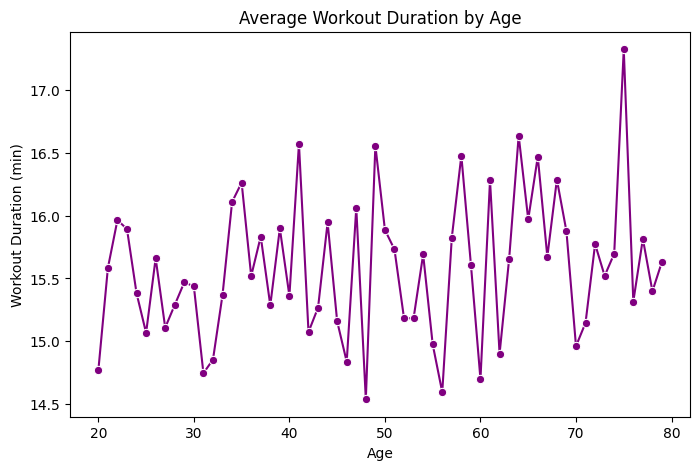

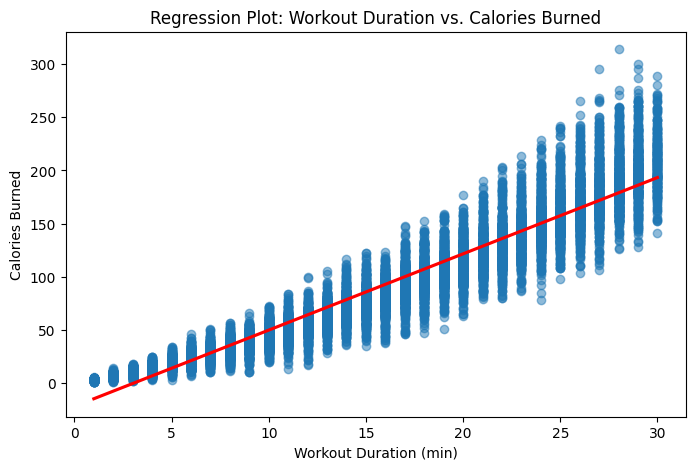

In [10]:
# Add BMI calculation
def add_bmi(df):
    df['BMI'] = df['Weight'] / ((df['Height'] * 0.01) ** 2)
    return df

# Categorizing BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Load and process data
data = get_data()
data = add_bmi(data)
data['BMI_Category'] = data['BMI'].apply(classify_bmi)



# 1. Line Plot: Age vs. Workout Duration ---
age_workout = data.groupby('Age')['Duration'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_workout.index, y=age_workout.values, marker="o", color="purple")
plt.title("Average Workout Duration by Age")
plt.xlabel("Age")
plt.ylabel("Workout Duration (min)")
plt.show()


# 2. Regression Plot: Duration vs. Calories Burned ---
plt.figure(figsize=(8, 5))
sns.regplot(x=data['Duration'], y=data['Calories'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression Plot: Workout Duration vs. Calories Burned")
plt.xlabel("Workout Duration (min)")
plt.ylabel("Calories Burned")
plt.show()